In [4]:
import numpy as np
from brian2 import *
!pip install brian2

# Lecture 1

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'exact' (took 0.03s). [brian2.stateupdaters.base.method_choice]


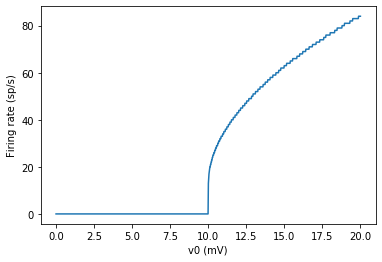

In [6]:
#RC-Circuit

from brian2 import *

n = 1000
duration = 1*second
tau = 10*ms
eqs = '''
dv/dt = (v0 - v) / tau : volt (unless refractory)
v0 : volt
'''
group = NeuronGroup(n, eqs, threshold='v > 10*mV', reset='v = 0*mV',
                    refractory=5*ms, method='exact')
group.v = 0*mV
group.v0 = '20*mV * i / (n-1)'

monitor = SpikeMonitor(group)

run(duration)
plot(group.v0/mV, monitor.count / duration)
xlabel('v0 (mV)')
ylabel('Firing rate (sp/s)')
show()